# scipy, matplotlib.pyplot, pandas (and datetime)

Note the **```pyplot```** module is imported directoy from **```matplotlib```** and is shortened to **```plt```**.  Pyplot is the main tool you will need to plot on screen and save figures using Matplotlib.

The best way to learn about scipy is through its [official tutorial](https://docs.scipy.org/doc/scipy-0.17.0/reference/tutorial/).

In [1]:
import numpy
import scipy
import scipy.stats
import matplotlib.pyplot as plt # note, this is often imported as "plt"
import pandas # for 2D tables like csv and text files
import datetime # for time series data

# special code for Jupyter Notebook; allows in-line plotting (may not be needed on your machine)
%matplotlib inline

Now let's create a "noisy" array of data.  Add in noise by using **```numpy.random.normal()```**, which draws random samples around a Gaussian distribution taking 3 arguments as input (location, stdev/scale, and size):  http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.random.normal.html

In [2]:
N = 1000
xvals = numpy.linspace(1,100,N)

In [3]:
a_signal = numpy.linspace(1,100,N)
a_noise = numpy.random.normal(loc=0, scale=5, size=N)
a = a_signal+a_noise

In [4]:
b_signal = numpy.linspace(1,100,N)
b_noise = numpy.random.normal(loc=0, scale=15, size=N)
b = b_signal+b_noise

Center a and b by their means:

In [5]:
a_ctd = a - a.mean()
b_ctd = b - b.mean()

Compute the standard deviation of a and b.  The following lines of code are equivalent to the standard deviation formula:

$$ \sigma_a = \sqrt{ \frac{1}{N-1} \sum^n_{i=1}(a_i - \bar{a})^2 } $$

In [6]:
a_stdev = numpy.std(a, ddof=1) # ensures 1/(N-1), default is (1/N)

a_stdev = ( (1./(N-1)) * numpy.sum(a_ctd**2.) ) ** 0.5

a_stdev = numpy.sqrt( (1./(N-1)) * numpy.sum(a_ctd**2.) )

In [7]:
b_stdev = numpy.sqrt( (1./(N-1)) * numpy.sum(b_ctd**2.) )

## Pearson correlation using ```scipy.stats.pearsonr()```

Compute the correlation between a and b.  You can do this using **```scipy.stats.pearsonr()```**.

Note that this function outputs a tuple with the correlation value and the p-value.  See the documentation here:  http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.pearsonr.html

Also beware that the **```scipy.stats.pearsonr()```** function does not use a conservative $\frac{1}{(N-1)}$ estimate of standard deviation.

$$ \mathrm{corr} = \frac{ \sum^n_{i=1} (a_i-\bar{a})(b_i-\bar{b})}{\sigma_a \sigma_b} $$

In [8]:
ab_corr = scipy.stats.pearsonr(a,b)
print(ab_corr)

(0.8723273770351607, 2.10259100011e-312)


You can also calculate the correlation by hand (though the p-value isn't as straightforward).

In [9]:
a_stdev, b_stdev = numpy.std(a), numpy.std(b) # note multiple assignments per line, NON-conservative estimate
ab_corr = numpy.mean( (b_ctd*a_ctd) / (a_stdev*b_stdev) )

In [10]:
print(ab_corr)

0.8723273770351605


## Linear regression using ```scipy.stats.linregress()```

Now calculate a simple linear regression on the a and b arrays.  Note **```scipy.stats.linregress()```** outputs 5 different variables.  See its documentation here:  http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [11]:
a_slope, a_intercept, a_rval, a_pval, a_stderr = scipy.stats.linregress(a,xvals)
b_slope, b_intercept, b_rval, b_pval, b_stderr = scipy.stats.linregress(a,xvals)
print(a_slope, b_slope)

0.9657592451531539 0.9657592451531539


Calculate a line of best fit using the linear regression info:

In [12]:
a_fit = a_slope * xvals + a_intercept
b_fit = b_slope * xvals + b_intercept

# Matplotlib

If/when you have the time, the official [Pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html) is a good place to start.

## Simple plotting

* Now plot the a and b data along with a best-fit line.
* There are a few different ways of creating a figure.
* One way is using **```plt.plot()```** directory:

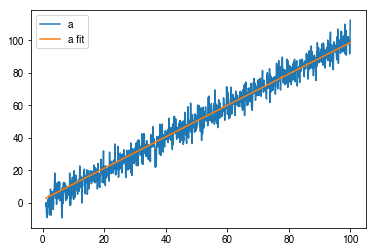

In [13]:
plt.plot(xvals, a, label='a')
plt.plot(xvals, a_fit, label='a fit')
plt.legend()

Another way is calling **```plt.subplot()```**, which will allow you to plot panels using a (row,col,plot_number) syntax:

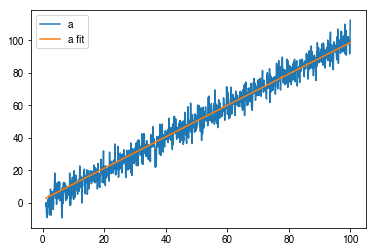

In [14]:
ax1 = plt.subplot(1,1,1) # (rows, cols, plot)
ax1.plot(xvals, a, label='a')
ax1.plot(xvals, a_fit, label='a fit')
ax1.legend()

The most flexible way of creating a figure is to create it using **```fig = plt.figure()```** and *adding* subplots one by one using **```fig.add_subplot()```**.

* ** The advantage of this method is that axes can be adjusted individually and there is a LOT of flexibitily here.**
* **If you plan to be creating publication-ready figures, this is a great place to start.**
* Note this figure is saved twice as a PDF using the **```plt.savefig()```** function:  http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig

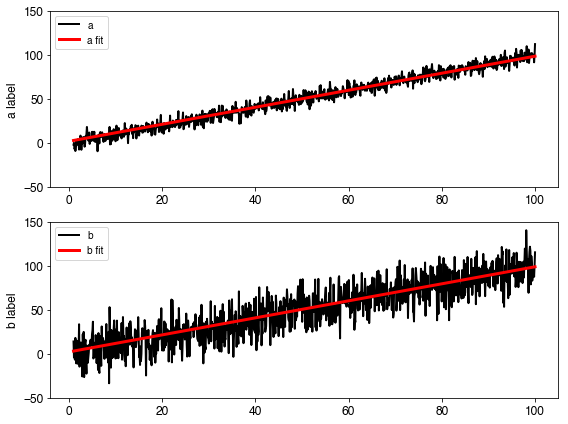

In [15]:
fig = plt.figure(figsize=(8,6)) # size is optional

my_font_size = 12

ax1 = fig.add_subplot(2,1,1) # (rows, cols, plot)
ax1.plot(xvals, a, label='a', color='black', lw=2)
ax1.plot(xvals, a_fit, color='red', label='a fit', lw=3)
ax1.set_ylim(-50,150)
ax1.set_ylabel('a label', fontsize = my_font_size)
ax1.tick_params(labelsize = my_font_size)
ax1.legend(loc=0)

ax2 = fig.add_subplot(2,1,2)
ax2.plot(xvals, b, label='b', color='black', lw=2)
ax2.plot(xvals, b_fit, color='red', label='b fit', lw=3)
ax2.set_ylim(-50,150)
ax2.set_ylabel('b label', fontsize = my_font_size)
ax2.tick_params(labelsize = my_font_size)
ax2.legend(loc=0)

plt.tight_layout() # helpful for stretching axes to the "figsize" chosen in line 1
plt.savefig('ab_trends.pdf', transparent=True)

## Example using ENSO indices

Download Nino index data (.txt file) data from the Climate Prediction Center website:
http://www.cpc.ncep.noaa.gov/data/indices/ersst4.nino.mth.81-10.ascii

(This file is also available in the week2 folder on the seminar webpage.)

In [16]:
filename = 'ersst4.nino.mth.81-10.ascii.txt'
data_file = pandas.read_table(filename, delim_whitespace=True)
data = data_file.values

In [17]:
type(data_file)

pandas.core.frame.DataFrame

In [18]:
data_file.describe()

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.00000,795.000000,795.000000,795.000000
mean,1982.626415,6.483019,23.162918,-0.251560,25.897333,-0.183270,28.47644,-0.162403,27.012164,-0.149811
std,19.137052,3.459103,2.205630,1.000732,1.229816,0.840972,0.64581,0.611824,0.926949,0.819713
min,1950.000000,1.000000,19.190000,-2.750000,22.830000,-2.280000,26.54000,-1.890000,24.520000,-2.260000
25%,1966.000000,3.000000,21.305000,-0.910000,24.930000,-0.760000,28.05500,-0.580000,26.375000,-0.750000
50%,1983.000000,6.000000,22.950000,-0.400000,25.900000,-0.240000,28.51000,-0.130000,27.070000,-0.190000
75%,1999.000000,9.000000,25.080000,0.225000,26.855000,0.265000,28.99500,0.290000,27.660000,0.350000
max,2016.000000,12.000000,29.120000,4.090000,29.240000,3.100000,29.99000,1.300000,29.140000,2.370000


In [19]:
# the first column [0] is the year of the data set
# the ninth column [9] is the Nino3.4 index
print(data.shape)

(795, 10)


In [20]:
years = data[:,0]
months = data[:,1]
nino34 = data[:,8]
nino34_centered = nino34 - nino34.mean()

### Use the ```datetime``` module in Python to handle dates and time series

This file contains monthly averages of ENSO indices.  The time is only given as the year, however, so we must convert 

In [21]:
today = datetime.date(2018,3,7)
now = datetime.datetime(2018,3,7,13,45,0)
print(today)
print(now)

2018-03-07
2018-03-07 13:45:00


In [22]:
ntime = years.size # length of time series array

# TWO WAYS to create a list of datetime objects
# for loop option:
year_month_list = []
for i in range(ntime):
    year_month_list.append(datetime.date( int(years[i]), int(months[i]) ,15))

### Note:  [list comprehensions](http://www.secnetix.de/olli/Python/list_comprehensions.hawk) are a fast way to create a list that has a "built-in" for loop:

In [23]:
year_month_list = [datetime.date(int(years[i]), int(months[i]), 15) for i in range(ntime)]

### Now create a figure of the monthly, centered Niño 3.4 index

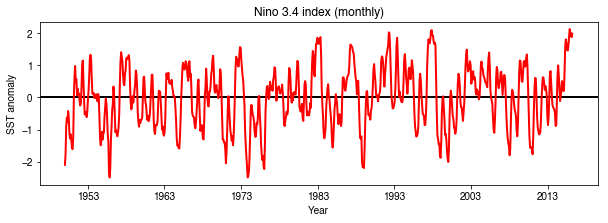

In [24]:
fig = plt.figure(figsize=(10,3)) # figsize=(inches wide, inches tall) --> not necessary
ax = fig.add_subplot(1,1,1)

ax.plot(year_month_list,nino34_centered, color='red', lw=2) # a higher zorder means the line will sit over others
ax.set_xlabel('Year')
ax.set_ylabel('SST anomaly')
ax.set_title('Nino 3.4 index (monthly)')
ax.axhline(y=0, color='black', ls='-', lw=2, zorder=1)

**Create a moving or rolling average using the ```pandas``` module, which comes with the Anaconda distribution.**

Note pandas is the Python Data Analysis Library and is *distinct* from NumPy and SciPy but provides a lot of complementary functions:  http://pandas.pydata.org/

In [25]:
nino34_centered_rolling_mean = pandas.Series(nino34_centered).rolling(window=12,center=True).mean()

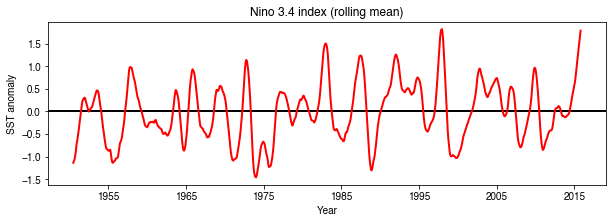

In [26]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)
ax.plot(year_month_list,nino34_centered_rolling_mean, color='red', lw=2, zorder=2)
ax.set_xlabel('Year')
ax.set_ylabel('SST anomaly')
ax.set_title('Nino 3.4 index (rolling mean)')
ax.axhline(y=0, color='black', ls='-', lw=2, zorder=1)